In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy

### 1

### a

In [97]:
fs = 256 #Hz
dt = 1/fs
t_vector = np.arange(0,5 * 60,1/fs) #5 minutes * 60 seconds/minute at 1/256 s step size
white_noise = np.random.normal(size=len(t_vector), scale=1, loc=0)
s = white_noise

Text(0, 0.5, 'Stimulus contrast, s(t)')

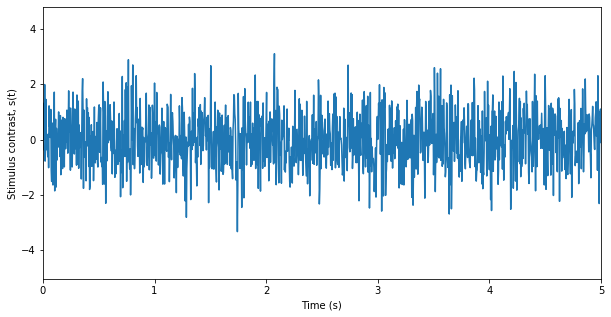

In [98]:

plt.figure(figsize=(10,5))
plt.plot(t_vector, white_noise)
plt.xlim([0,5])
plt.xlabel('Time (s)')
plt.ylabel('Stimulus contrast, s(t)')

### b

(0, 0.5)

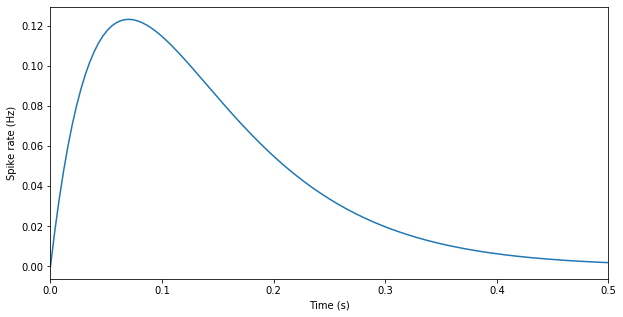

In [99]:

tau = 0.07 # s
R = 6 # Hz
h = (R * dt) * (t_vector / tau**2) * np.exp(-t_vector / tau)
# Since R is the spike rate per second R*dt is the spike rate per 1/256 seconds

plt.figure(figsize=(10,5))
plt.plot(t_vector, h)
plt.xlabel('Time (s)')
plt.ylabel('Spike rate (Hz)')
plt.xlim([0,1/2])


### c

Text(0, 0.5, 'Filter magnitude, |H(w)|^2')

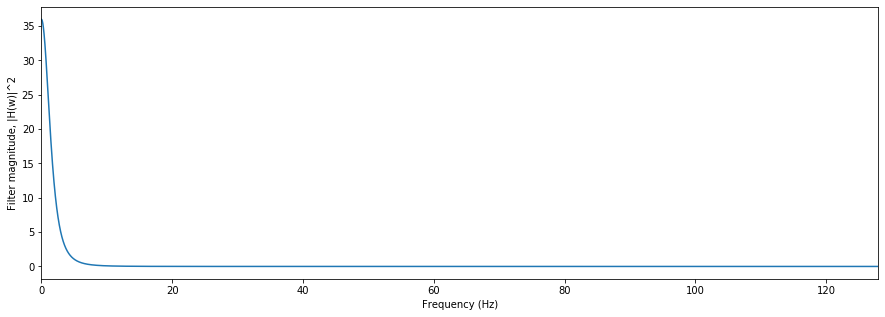

In [101]:

H = np.fft.fft(h)
freq = np.fft.fftfreq(len(h), dt)

plt.figure(figsize=(15,5))
plt.plot(freq[freq>0], (np.abs(H)**2)[freq>0])
plt.xlim([0,fs/2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter magnitude, |H(w)|^2')
# dprint('low pass filter')


### d

Text(0.5, 0, 'Time (s)')

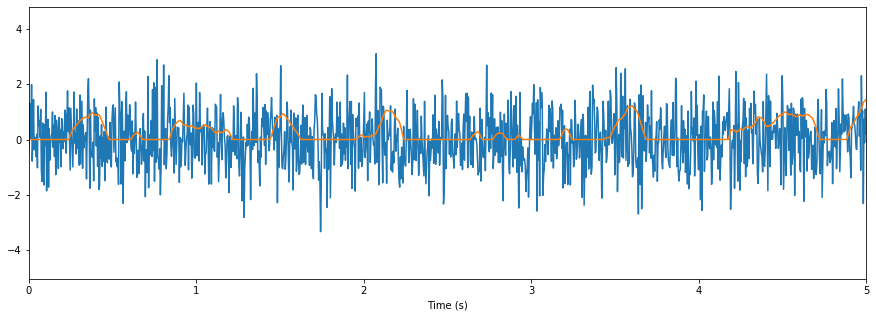

In [103]:
r = np.fft.ifft(np.fft.fft(s) * H).real
r = r * (r>0)

plt.figure(figsize=(15,5))
plt.plot(t_vector, s)
plt.plot(t_vector, r)

plt.xlim([0,5])
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

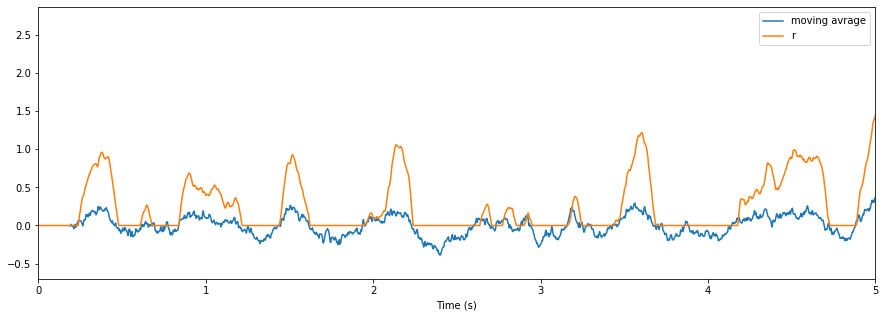

In [104]:
# To show that when the stimuls is higher the response rate is also higher
# I plot the response rate and a moving avrage of s. 
windowe_length = 50
cumsum_vec = np.cumsum(np.insert(white_noise, 0, 0)) 
ma_vec = (cumsum_vec[windowe_length:] - cumsum_vec[:-windowe_length]) / windowe_length
plt.figure(figsize=(15,5))
plt.plot(t_vector[windowe_length-1:], ma_vec, label= "moving avrage")
plt.plot(t_vector, r, label= "r")
plt.legend()
plt.xlim([0,5])
plt.xlabel('Time (s)')

### e

In [110]:
p = np.ones(t_vector.shape) * (np.random.random(t_vector.shape) < r * dt)
spikes = p

### f

(0, 1)

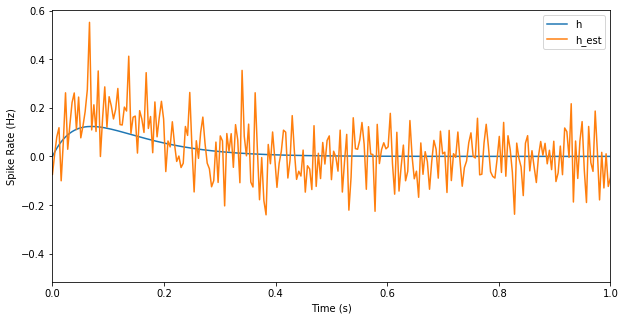

In [111]:
h_est = np.fft.ifft(np.fft.fft(p) * np.fft.fft(s[::-1])).real 
#You can also multiply by the complex conjugate of F(s). np.fft.fft(white_noise[::-1]) == np.conj(np.fft.fft(white_noise))
h_est = h_est / p.sum()
plt.figure(figsize=(10,5))
plt.plot(t_vector, h, label= "h")
plt.plot(t_vector, h_est, label= "h_est")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Spike Rate (Hz)')
plt.xlim([0,1])


(0, 2)

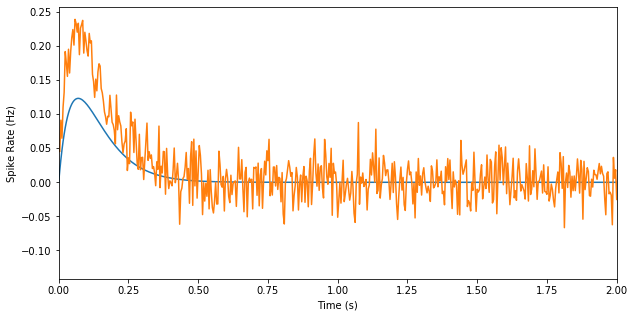

In [112]:
# to check that our estimation method is correct try increasing the amount of data (thus reducing the randomness) 
# either make the original signal longer or make the spike rate artificial higher (increasing the likelihood of spikes)

t_long = np.arange(0,100 * 60,1/fs) #50 minutes * 60 seconds/minute at 1/256 s step size
s_long = np.random.normal(size=len(t_long), scale=1, loc=0)
h_long = (R * dt) * (t_long / tau**2) * np.exp(-t_long / tau)
H_long = np.fft.fft(h_long)
r_long = np.fft.ifft(np.fft.fft(s_long) * H_long).real
r_long = r_long * (r_long>0)

p_long = np.ones(t_long.shape) * (np.random.random(t_long.shape) < r_long * dt)

h_est_long = np.fft.ifft(np.fft.fft(p_long) * np.fft.fft(s_long[::-1])).real 
h_est_long = h_est_long / p_long.sum()

plt.figure(figsize=(10,5))
plt.plot(t_long, h_long)
plt.plot(t_long, h_est_long)

plt.xlabel('Time (s)')
plt.ylabel('Spike Rate (Hz)')
plt.xlim([0,2])


### g

Text(0, 0.5, 'r')

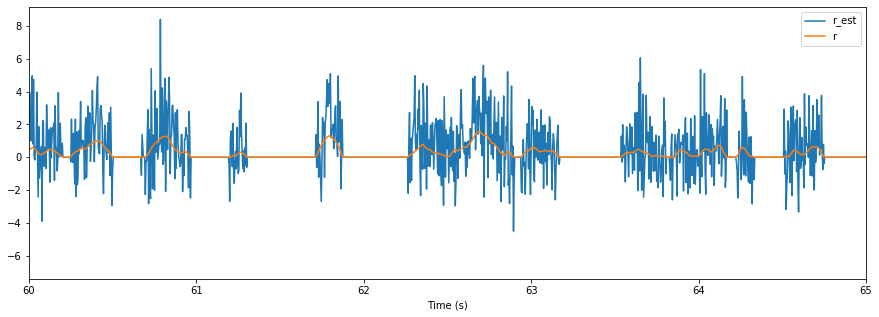

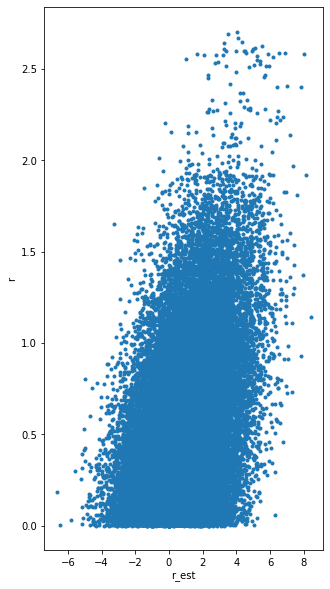

In [113]:
h_est = (h_est * (t_vector < 1)) 
r_est = np.fft.ifft(np.fft.fft(white_noise) * np.fft.fft(h_est)).real
r_est = r_est * (r>0)

plt.figure(figsize=(15,5))
plt.plot(t_vector, r_est , label= "r_est")
plt.plot(t_vector, r, label= "r")

plt.xlim([60,65])
plt.xlabel('Time (s)')
plt.legend()

plt.figure(figsize=(5,10))
plt.plot(r_est,r, '.', label= "corr")
plt.xlabel('r_est')
plt.ylabel('r')


### 2

### a,b

In [114]:

n = 500
h_shuff = []
for i in range(0,n):
    spikes_shuff = np.random.permutation(spikes)
    rev_corr = np.fft.ifft(np.fft.fft(spikes_shuff) * np.conj(np.fft.fft(white_noise))).real
    rev_corr = rev_corr / spikes_shuff.sum()
    h_shuff.append(rev_corr)
    
h_shuff = np.asarray(h_shuff)  

In [94]:
h_shuff.shape

(500, 76800)

### c

In [115]:
p = []
for i in range(len(t_vector)):
    p.append( 1/n * ((np.abs(h_est[i]) < np.abs(h_shuff[:,i])).sum() + 1))
p = np.asarray(p)

Text(0, 0.5, '-log10( p value )')

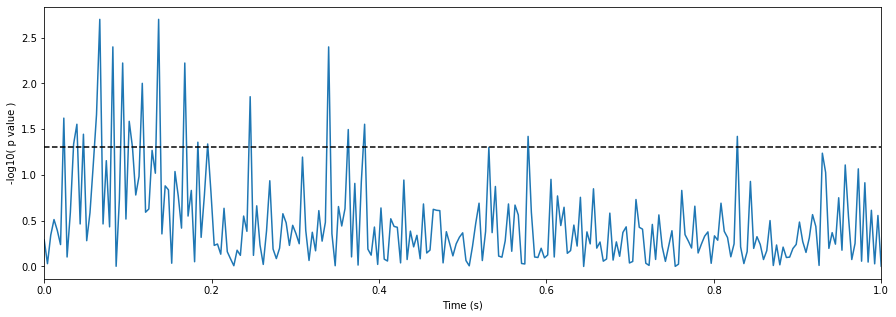

In [116]:
plt.figure(figsize=(15,5))
plt.plot(t_vector, -np.log10(p))
plt.plot(t_vector, -np.log10(0.05+0*t_vector), 'k--')
plt.xlim([0,1])
plt.xlabel('Time (s)')
plt.ylabel('-log10( p value )')

### d

We can expect to have 5% of 256 = 12.8 false positives every second on average if our correlation of our estimate and the real spike rate is 0.

In [122]:
rate_false_positive = np.mean(p[(t_vector > 0.2) * (t_vector < 1)] < 0.05)
print('our false positive rate =', rate_false_positive)

our false positive rate = 0.029411764705882353


### e
With N=256 (# of samples in each 1 second = to our sampling frequency) we would need an Bonferroni-corrected p-value threshold of alpha_Bonferroni = 0.05 / 256 = 1.9e-4 to ensure a less then 5% chance of even a single false positive. This means running at least 256/0.05 = 5120 shuffles 

In [123]:
0.05 / 256

0.0001953125

In [124]:
256 / 0.05

5120.0